In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("spam_ham_dataset.csv")

In [3]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [5]:
data['label']=label.fit_transform(data['label'])

In [6]:
data

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,0,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,0,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,0,Subject: industrial worksheets for august 2000...,0


In [7]:
data['text']=label.fit_transform(data['text'])

In [8]:
data

,Unnamed: 0,label,text,label_num
0,605,0,1209,0
1,2349,0,1985,0
2,3624,0,2774,0
3,4685,1,3158,1
4,2030,0,3613,0
...,...,...,...,...
5166,1518,0,3254,0
5167,404,0,125,0
5168,2933,0,495,0
5169,1409,0,2223,0


In [9]:
np_df=data.to_numpy()

In [10]:
np_df

array([[ 605,    0, 1209,    0],
       [2349,    0, 1985,    0],
       [3624,    0, 2774,    0],
       ...,
       [2933,    0,  495,    0],
       [1409,    0, 2223,    0],
       [4807,    1, 2195,    1]], dtype=int64)

In [11]:
x_data=np_df[:,0:3]
x_data

array([[ 605,    0, 1209],
       [2349,    0, 1985],
       [3624,    0, 2774],
       ...,
       [2933,    0,  495],
       [1409,    0, 2223],
       [4807,    1, 2195]], dtype=int64)

In [12]:
y_data=np_df[:,-1]
y_data

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
x_data=sc.fit_transform(x_data)
y_data=tf.keras.utils.to_categorical(y_data,2)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,train_size=0.8,random_state=42)

In [17]:
#creation model
from tensorflow import keras

In [18]:
NB_CLASSES=2

In [19]:
model=tf.keras.models.Sequential()

In [20]:
#add first input layer
model.add(keras.layers.Dense(128,input_shape=(3,),activation='relu'))#parameters 1.no of nodes,no of input variables,logical name of layer,activation function
#add hidden layers
model.add(keras.layers.Dense(128,activation='relu'))
#add out layer
model.add(keras.layers.Dense(NB_CLASSES,activation='softmax'))
#compile the model with losses and metrics
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
207/207 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9970 - val_loss: 4.9740e-05 - val_accuracy: 1.0000
Epoch 2/10
207/207 [==============================] - 1s 3ms/step - loss: 2.7909e-05 - accuracy: 1.0000 - val_loss: 1.5650e-05 - val_accuracy: 1.0000
Epoch 3/10
207/207 [==============================] - 1s 3ms/step - loss: 1.2229e-05 - accuracy: 1.0000 - val_loss: 8.9752e-06 - val_accuracy: 1.0000
Epoch 4/10
207/207 [==============================] - 1s 3ms/step - loss: 7.7402e-06 - accuracy: 1.0000 - val_loss: 6.2058e-06 - val_accuracy: 1.0000
Epoch 5/10
207/207 [==============================] - 1s 3ms/step - loss: 5.6151e-06 - accuracy: 1.0000 - val_loss: 4.7066e-06 - val_accuracy: 1.0000
Epoch 6/10
207/207 [==============================] - 1s 3ms/step - loss: 4.3811e-06 - accuracy: 1.0000 - val_loss: 3.7751e-06 - val_accuracy: 1.0000
Epoch 7/10
207/207 [==============================] - 1s 3ms/step - loss: 3.5784e-06 - accuracy: 1.0000 

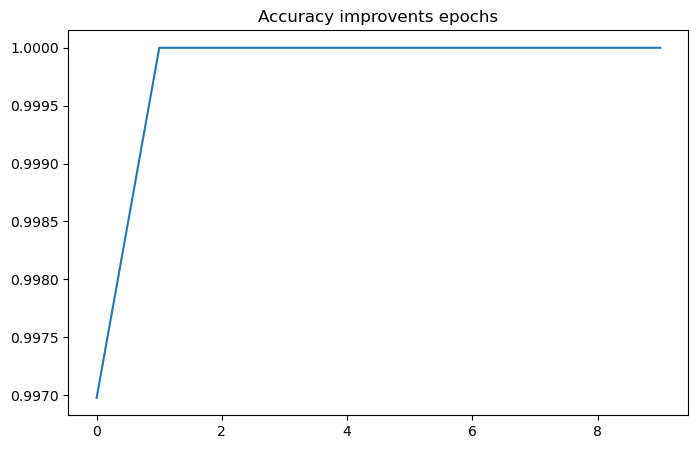

33/33 [==============================] - 0s 3ms/step - loss: 2.1008e-06 - accuracy: 1.0000


[2.1008427211199887e-06, 1.0]

In [21]:
#trining model
VERBOS=1 #make it to 1 so we can see the progress of the model
#setup hyper parameter for training
#set batch_size
BATCH_SIZE=16
#SET NUMBER OF EPOTCHES
EPOCHS=10
#set validation split
VALIDATION_SPLIT=0.2
#fit model
hstry=model.fit(xtrain,ytrain,batch_size=16,epochs=10,verbose=1,validation_split=VALIDATION_SPLIT)
pd.DataFrame(hstry.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy improvents epochs')
plt.show()
model.evaluate(xtest,ytest)


In [24]:
prediction_input=[[0,1209,0]]

#scale the prediction_input
scale_input=sc.fit_transform(prediction_input)

#prediction the output
raw_predictions=model.predict(scale_input)

print("Raw Predict output(probablities):",raw_predictions)


#find the orediction
prediction=np.argmax(raw_predictions)  #to get the index of the high probablity
print("prediction is",label.inverse_transform([prediction]))

1/1 [==============================] - 0s 125ms/step
Raw Predict output(probablities): [[0.9980286 0.0019714]]
prediction is ['Subject: \r\n']
